Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-11-06 02:39:51--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-11-06 02:39:51--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-11-06 02:39:51 (53.9 MB/s)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [7]:
display(data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

El conjunto de datos tiene las variables: identificador de cliente, genero de los clientes, la edad de los clientes, el ingreso anual de los clientes, la puntuación asignada por el centro comercial en función del comportamieno y los hábitos de gasto de los clientes.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [13]:
data = data.drop('Gender', axis=1)

data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [17]:
train_missing_values = data.isnull().sum()
num_columns_with_train_missing_values = (train_missing_values > 0).sum()
print(f'Total number of columns with missing values: {num_columns_with_train_missing_values}')

Total number of columns with missing values: 0


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos antes de aplicar el algoritmo K-means, ya que este se basa en la distancia. Calcula la distancia entre los puntos de datos para formar clústeres. Si las características tienen escalas diferentes, las que tengan valores mayores influirán en el cálculo de la distancia, lo que generará resultados sesgados.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


In [18]:
print("Data Types:")
print(data.dtypes)

Data Types:
CustomerID                int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [19]:
unique_values_per_column = data.nunique()
sorted_unique_values = unique_values_per_column.sort_values(ascending=False)

print(f"{sorted_unique_values} unique values")

CustomerID                200
Spending Score (1-100)     84
Annual Income (k$)         64
Age                        51
dtype: int64 unique values


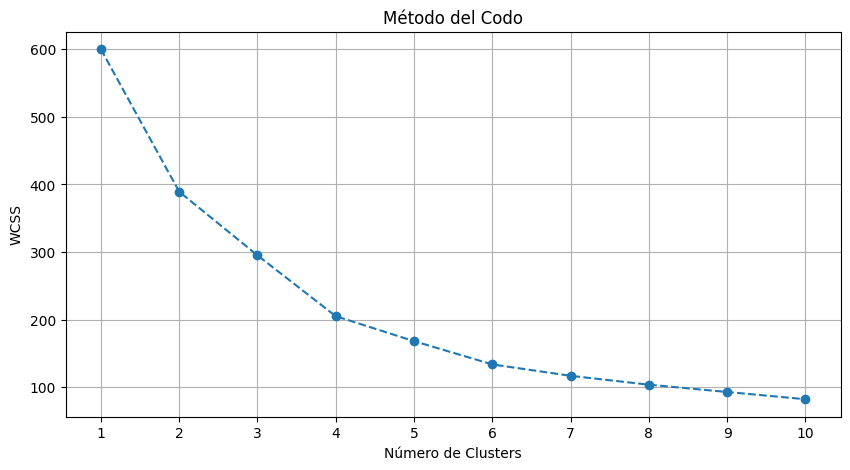

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

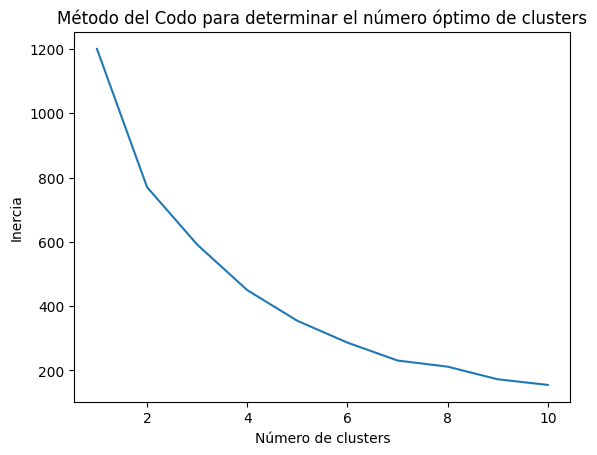

In [34]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficamos los resultados
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

en el punto 4 empieza a formarce el codo, y son apropiados 4 clusters para este ejercicio




Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [35]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)


In [22]:
# Fit K-means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

display(data.head())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,1
4,5,31,17,40,1


In [28]:
kmeans = KMeans(4)
data['Cluster'] = kmeans.fit_predict(X_scaled)
display(data.head())
fig.show()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,2,21,15,81,3
2,3,20,16,6,3
3,4,23,16,77,3
4,5,31,17,40,3


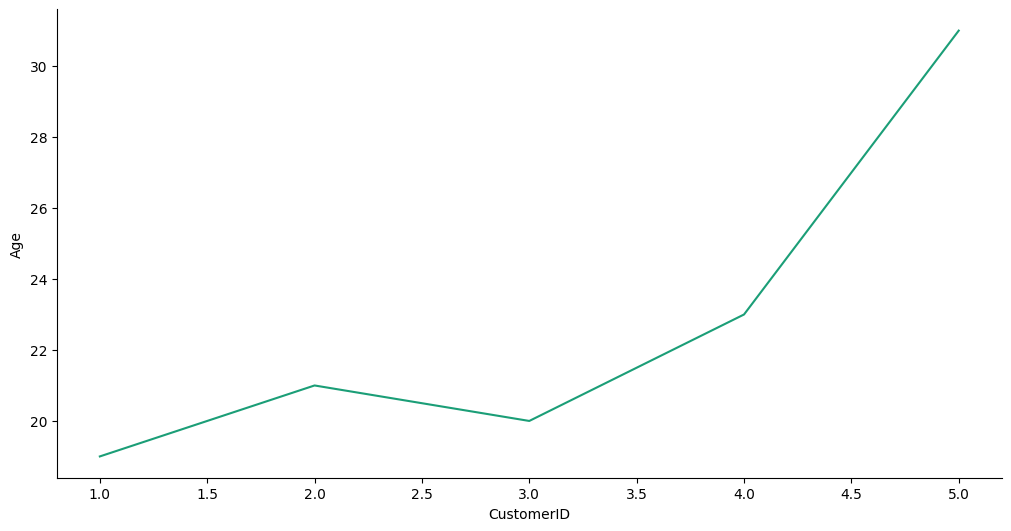

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('CustomerID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

aqui vemos que los clientes se han dividido en 5 grupos clasificandolos por edades ingresos anuales y puntuación de gasto.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [29]:
display(data.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.695000
std,57.879185,13.969007,26.264721,25.823522,1.089915
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,2.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,3.000000


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



las diferencias de edad reflejan los ingresoso y el puntaje de gastos, esto nos puede ayudar a tomar decisiones de prestamos y de las actividades que pueden realizar estas personas, también, que las personas que son de una edad mas chica, tienen menos ingresos y menos puntaje que las mayores

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

In [31]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans

def kmeans_plotter(data, k=7):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Add cluster labels to the dataframe
    data['label'] = kmeans.labels_

    # Create a 3D scatter plot with the clustered data
    fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='label',
                         symbol='label', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'},
                         opacity=0.7, width=900, height=850,
                         title=f'K-Means Clustering with k={k}',
                         labels={'label': 'Cluster'},
                         color_discrete_map={})  # Remove color legend

    fig.update_layout(showlegend=False)  # Remove color legend
    return fig

# Assuming 'train_data' is your DataFrame containing the data

# Call the function to create the K-Means clustering plot
fig = kmeans_plotter(data)
fig.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Si, en la grafica podemos ver como los clientes estan separados por grupos y colores, lo que facilita la visualización de los datos


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

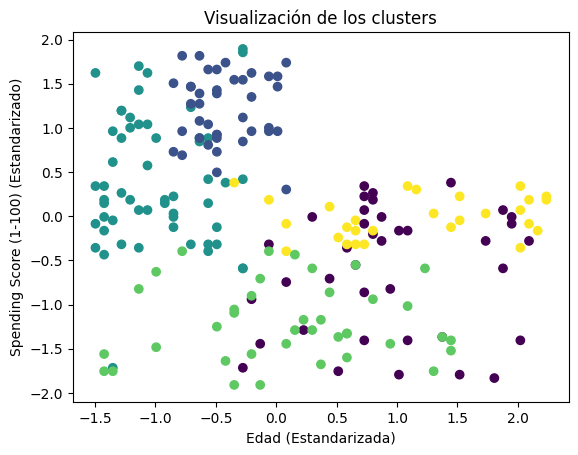

In [36]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=data['Cluster'], cmap='viridis')
plt.xlabel('Edad (Estandarizada)')
plt.ylabel('Spending Score (1-100) (Estandarizado)')
plt.title('Visualización de los clusters')
plt.show()

Basado en el analisis de los datos se identificaron 4 clusters:

Cluster 0: Clientes con Altos Ingresos y Alto Gasto.

Cluster 1: Clientes con Altos Ingresos y Bajo Gasto.

Cluster 2: Clientes de Mayor Edad con Ingresos y Gasto Moderados.

Cluster 3: Clientes Jóvenes con Ingresos Bajos y Gasto Moderado a Alto.